<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/5_SiPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: Silicon Photomultipliers (SiPM)

### October 11th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 11/10/2021


## Configuration

### Clone the GIT

In [2]:
!rm -r ./sample_data
import os
from getpass import getpass
user = input('GitHub user')
mail = input('GitHub email')
password = getpass('GitHub password')
os.environ['GITHUB_AUTH'] = user + ':' + password
!git clone https://$GITHUB_AUTH@github.com/valeriopagliarino/Electronics-2021-UNITO.git
!git config --global user.email user
!git config --global user.name mail

rm: cannot remove './sample_data': No such file or directory
GitHub uservaleriopagliarino
GitHub emailvalerio.pagliarino@edu.unito.it
GitHub password··········
fatal: destination path 'Electronics-2021-UNITO' already exists and is not an empty directory.


### Install environment

In [ ]:
exec(open("./Electronics-2021-UNITO/analysis/ROOT-config.py").read())

Start config for JupyROOT Env. on Google Coolab - It takes about 3 minutes
WGET...
Done.
UNZIP...
TAR...
APT...
Installation completed.
Shared objects loaded.
Welcome to JupyROOT 6.14/04
Completed!


### Importa moduli [no COLAB]

In [ ]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

### Importa moduli [COLAB]

In [3]:
%cd /content/
!pip3 install uncertainties
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from uncertainties import ufloat
import uncertainties.umath
from matplotlib import pyplot as plt
import pickle#Pickle with dict of Numpy arrays

# Variables for directories
DATADIR = "/content/Electronics-2021-UNITO/data-source"
OUTPUTDIR = "/content/Electronics-2021-UNITO/analysis/output"

/content


## SiPM

[Text(0.5, 1.0, 'Istantanea oscilloscopio')]

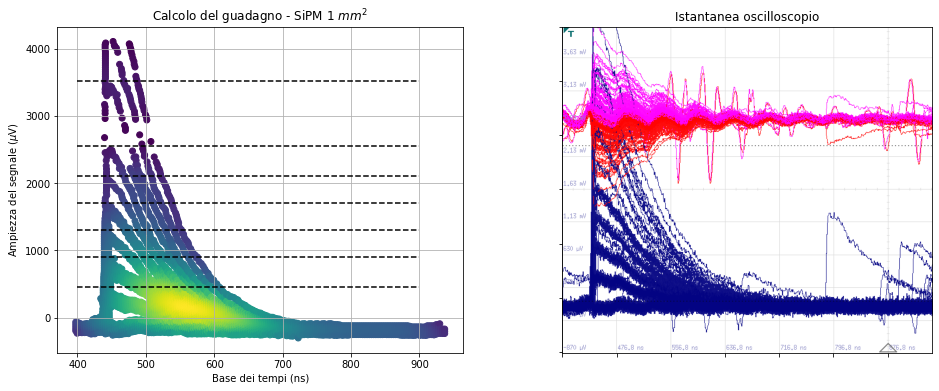

In [29]:
from scipy.stats import gaussian_kde
import cv2
im = cv2.imread(f'{DATADIR}/11-10-21/GAIN1Z.PNG')
im = cv2.bitwise_not(im)

SiPM_1mm_data = pd.read_csv(f'{DATADIR}/11-10-21/SiPM_1mm_GAIN.csv')
t = SiPM_1mm_data['Time ns'].to_numpy()
v = SiPM_1mm_data[' Voltage uV'].to_numpy()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
tv = np.vstack([t,v])
z = gaussian_kde(tv)(tv)
ax[0].set(xlabel='Base dei tempi (ns)', ylabel='Ampiezza del segnale ($\mu$V)',
       title='Calcolo del guadagno - SiPM 1 $mm^2$')

ax[0].scatter(t,v, c = z)
ax[0].grid(which='both')

ax[0].hlines(450, 400, 900, linestyles="--")
ax[0].hlines(900, 400, 900, linestyles="--")
ax[0].hlines(1300, 400, 900, linestyles="--")
ax[0].hlines(1700, 400, 900, linestyles="--")
ax[0].hlines(2100, 400, 900, linestyles="--")
ax[0].hlines(2550, 400, 900, linestyles="--")
ax[0].hlines(3520, 400, 900, linestyles="--")

ax[1].imshow(im)
ax[1].set_yticklabels([])
ax[1].set_xticklabels([])
ax[1].set(title = "Istantanea oscilloscopio")

## Commit changes

In [ ]:
%cd /content/Electronics-2021-UNITO/
!git pull
!git add .
!git commit -m "Plots from data analysis"
!git push 